<a href="https://colab.research.google.com/github/ArtfulMonster/Machine-Learning/blob/main/HW3_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

# Import cancer data set
data = pd.read_csv("cancer.csv")
print(data.head())

# Seperating columns
y1 = data.values[:, 1]        # diagnoses
x1 = data.values[:, 2:30]     # All inputs

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [ ]:
# Seperating training and validation for cancer
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.20, random_state = 0)

# Scale cancer data
from sklearn.preprocessing import StandardScaler
sc_x1 = StandardScaler()
x1_train = sc_x1.fit_transform(x1_train)
x1_test = sc_x1.transform(x1_test)

# Logistic Regression of cancer data
model = GaussianNB()
model.fit(x1_train, y1_train)

GaussianNB()

In [ ]:
# Predicting cancer test output
y1_pred = model.predict(x1_test)
y1_pred[0:9]

array(['M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B'], dtype='<U1')

In [ ]:
# Confusion matrix to check cancer accuracy
from sklearn.metrics import confusion_matrix
cnf_matrix1 = confusion_matrix(y1_test, y1_pred)
cnf_matrix1

array([[62,  5],
       [ 5, 42]])

In [ ]:
# Evaluation of cancer model
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y1_test, y1_pred))
print("Precision:",metrics.precision_score(y1_test, y1_pred, average='macro'))
print("Recall:",metrics.recall_score(y1_test, y1_pred, average='macro'))
print("F1 score:",metrics.f1_score(y1_test, y1_pred, average='macro'))

Accuracy: 0.9122807017543859
Precision: 0.909495077802477
Recall: 0.909495077802477
F1 score: 0.909495077802477


Text(0.5, 427.9555555555555, 'Predicted label')

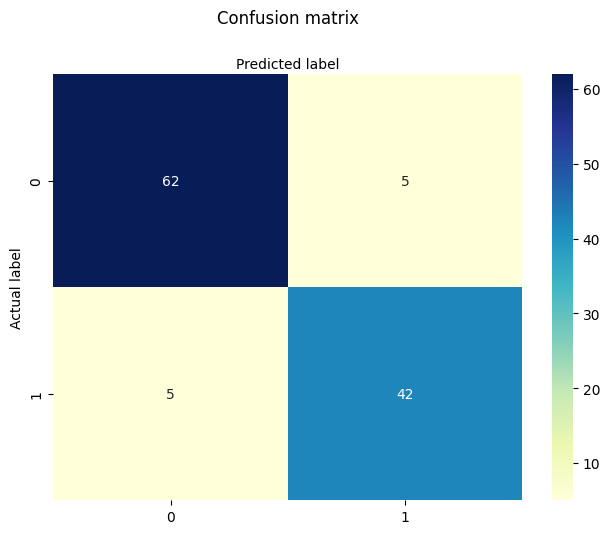

In [ ]:
# Creating visual cancer confusion matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# creating heatmap
sns.heatmap(pd.DataFrame(cnf_matrix1), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')